In [0]:
# load data

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
path = untar_data(URLs.MNIST_SAMPLE);path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
# data augmentation

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
# ImageDataBunch: data used for computer vision

In [0]:
# 1. get data from folder: ImageDataBunch.from_folder

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

['3', '7']

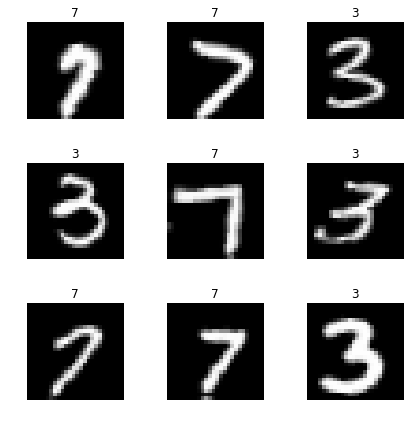

In [12]:
data.show_batch(rows=3, figsize=(6,6))
data.classes

In [0]:
# error_rate = 1-accuracy

In [14]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 51124201.34it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.165526,0.095652,0.964671,00:18
1,0.086324,0.045849,0.984298,00:18


In [0]:
# 2. get data from csv file (label:in csv file)

In [0]:
# df.head(n): return first n rows

In [19]:
df = pd.read_csv(path/'labels.csv')
df.head(5)

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=26)

[0, 1]

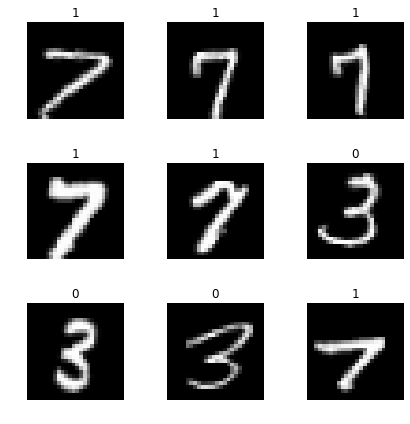

In [22]:
data.show_batch(rows=3, figsize=(6,6))
data.classes

In [0]:
# 3. get data from df (data frame)

In [0]:
df = pd.read_csv(path/'labels.csv')
df.head(5)

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=26)

[0, 1]

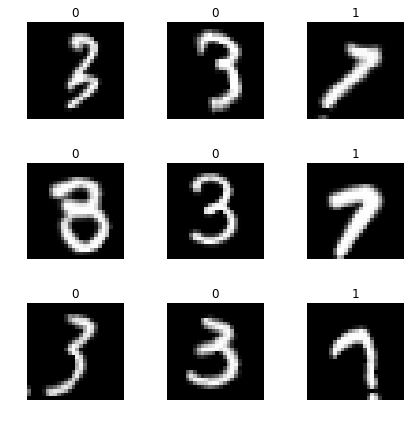

In [24]:
data.show_batch(rows=3, figsize=(6,6))
data.classes

In [0]:
# 4. get data from name regular expression: gets the labels from the filenames using a regular expression
# fn_paths: file path list
# pat: re expression pat.

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]
pat = r"/(\d)/\d+\.png$"

In [0]:
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=26)

['3', '7']

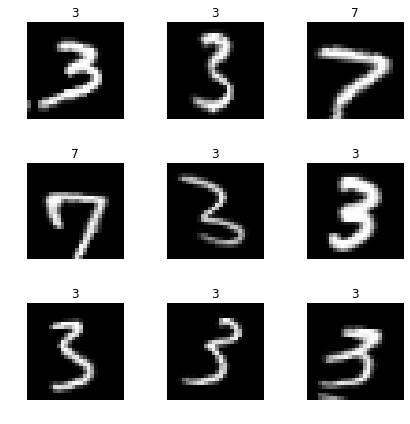

In [30]:
data.show_batch(rows=3, figsize=(6,6))
data.classes

In [0]:
# 5. get data from name function: gets the labels from the filenames using any function

In [0]:
def get_labels(file_path): 
  return '3' if '/3/' in str(file_path) else '7'

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=26, label_func = get_labels)

['3', '7']

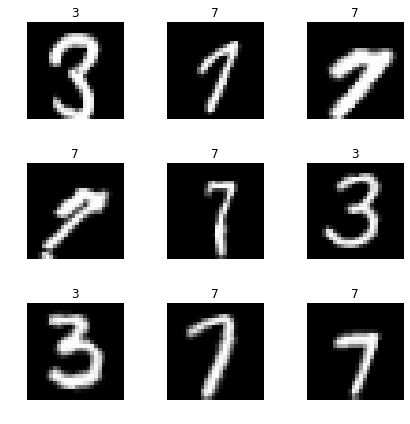

In [36]:
data.show_batch(rows=3, figsize=(6,6))
data.classes

In [0]:
# 6. get data from list: labels need to be provided as an input in a list

In [38]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=26)

['3', '7']

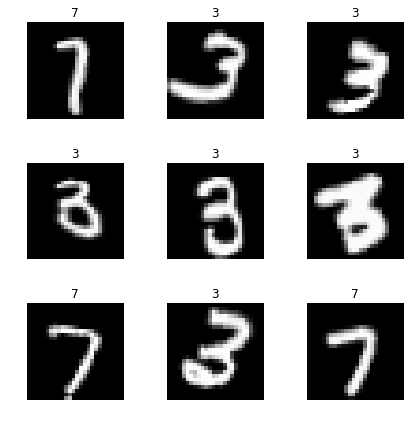

In [40]:
data.show_batch(rows=3, figsize=(6,6))
data.classes